<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>See <a href="https://github.com/ultralytics/yolov5/issues/new/choose">GitHub</a> for community support or <a href="https://ultralytics.com/contact">contact us</a> for professional support.

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install


YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


In [21]:
!unrar x "/content/dataset.rar" "/content/yolov5"


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/dataset.rar

Extracting  /content/dataset.yaml                                          0%  OK 
Creating    /content/dataset                                          OK
Creating    /content/dataset/images                                   OK
Creating    /content/dataset/images/train                             OK
Extracting  /content/dataset/images/train/IMG_20230128_163627.jpg          5%  6%  OK 
Extracting  /content/dataset/images/train/IMG_20230128_163630.jpg         11% 12%  OK 
Extracting  /content/dataset/images/train/IMG_20230128_163639.jpg         17%  OK 
Extracting  /content/dataset/images/train/IMG_20230128_163648.jpg         21%  OK 
Extracting  /content/dataset/images/train/IMG_20230128_163651.jpg         26%  OK 
Extracting  /content/dataset/images/train/IMG_20230128_163700.jpg         31%  OK 
Extract

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
# display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-1-gb32f67f Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

100% 14.1M/14.1M [00:00<00:00, 116MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 17.0ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 14.3ms
Speed: 0.5ms pre-process, 15.7ms inference, 18.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [37]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 80 --data /content/yolov5/dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=80, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: YOLOv5 requirement "tensorboard>=2.4.1" not found, attempting AutoUpdate...
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
onnx 1.13.0 requires protobuf<4,>=3.20.2, but you have protobuf 3.19

In [39]:
!python detect.py --weights runs/train/exp7/weights/best.pt --data /content/yolov5/dataset.yaml --conf 0.25 --source /content/yolov5/dataset/images/val/WIN_20230128_20_28_42_Pro.jpg

detect: weights=['runs/train/exp7/weights/best.pt'], source=/content/yolov5/dataset/images/val/WIN_20230128_20_28_42_Pro.jpg, data=/content/yolov5/dataset.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/dataset/images/val/WIN_20230128_20_28_42_Pro.jpg: 384x640 1 calculator, 13.3ms
Speed: 0.4ms pre-process, 13.3ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp11


In [40]:
!pip install onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.


In [42]:
!python export.py --weights /content/yolov5/runs/train/exp8/weights/best.pt --img 640 --data /content/yolov5/dataset.yaml --include onnx 

export: data=/content/yolov5/dataset.yaml, weights=['/content/yolov5/runs/train/exp8/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/exp8/weights/best.pt with output shape (1, 25200, 6) (13.8 MB)

ONNX: starting export with onnx 1.13.0...
ONNX: export success ✅ 0.9s, saved as /content/yolov5/runs/train/exp8/weights/best.onnx (27.2 MB)

Export complete (1.6s)
Results saved to /content/yolov5/runs/train/exp8/weights
Detect:          python detect.py --weights /content/yolov5/runs/train/exp8/weights/best.onnx 
Validate:        pyt

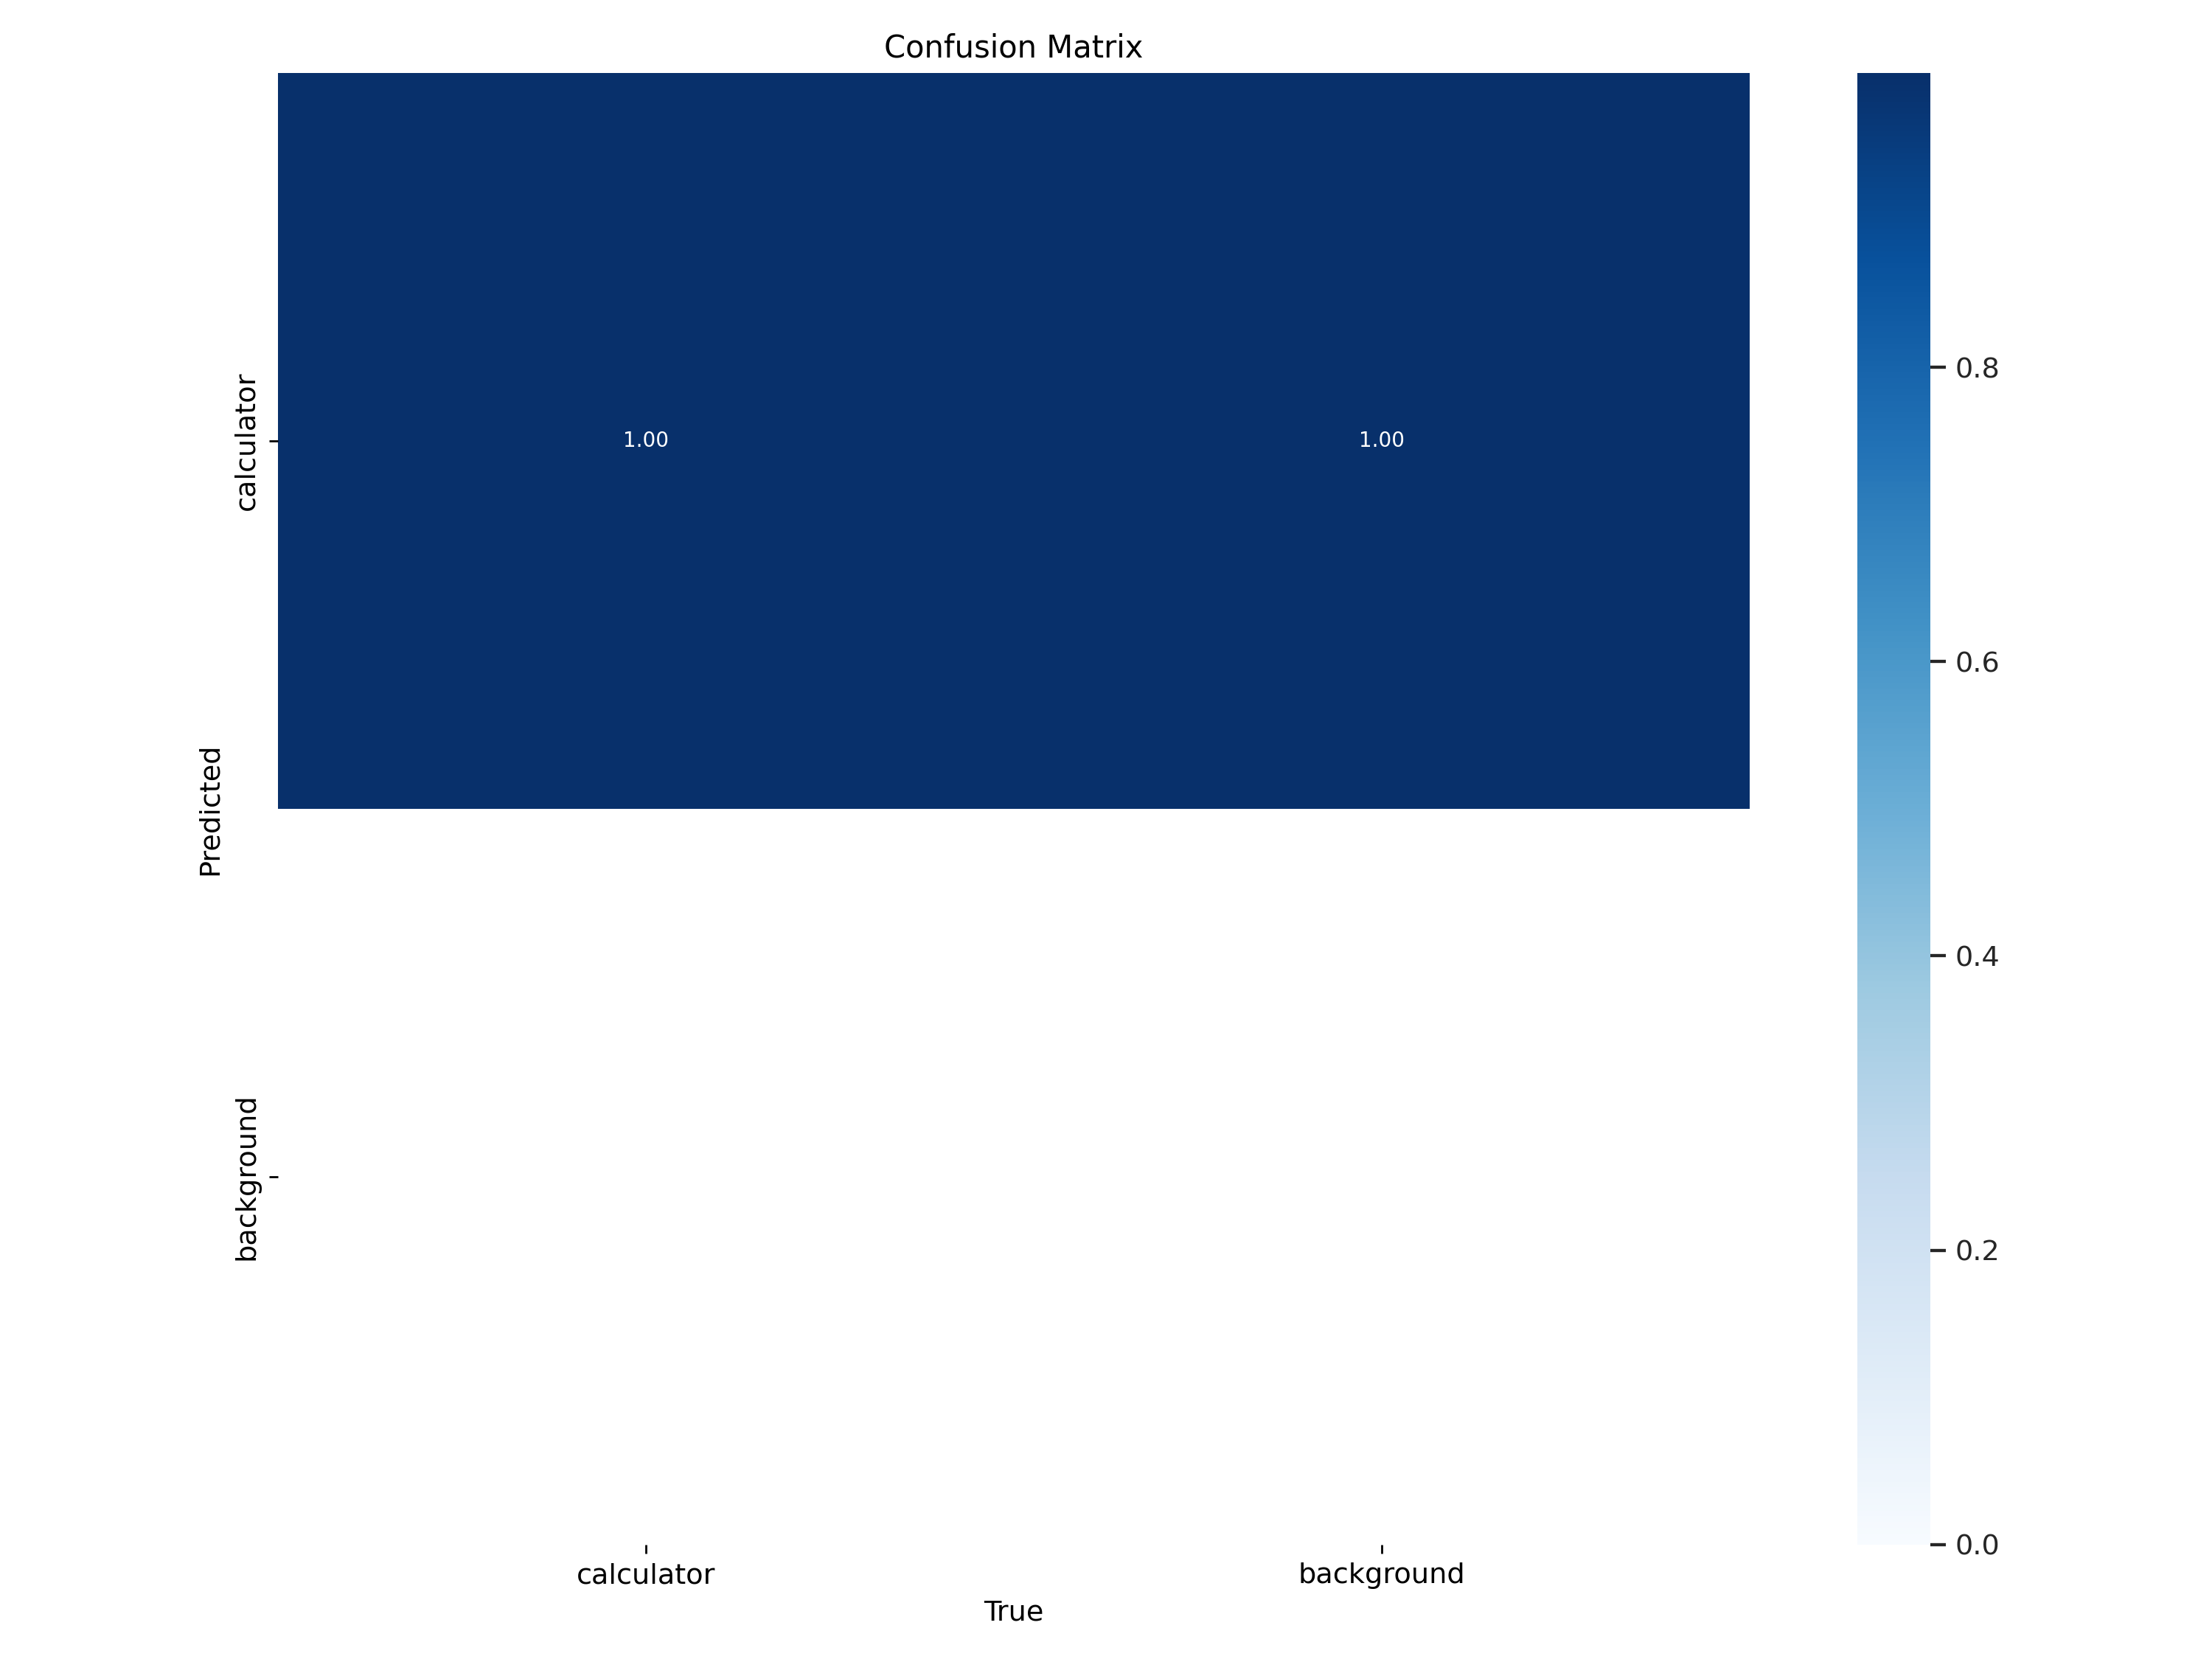

In [38]:
display.Image(filename='/content/yolov5/runs/train/exp8/confusion_matrix.png')